# Nyc taxi trip duration prediction

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as datetime
import seaborn as sns

In [2]:
#importing data
data=pd.read_csv(r"C:\Users\YOGENDRA SINGH\Desktop\EDA-ML-Final-Project\EDA+ML-Final Project\nyc_taxi_trip_duration.csv")

In [3]:
#checking initial 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,29-02-2016 16:40,29-02-2016 16:47,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,11-03-2016 23:35,11-03-2016 23:53,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,21-02-2016 17:59,21-02-2016 18:26,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,05-01-2016 09:44,05-01-2016 10:03,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,17-02-2016 06:42,17-02-2016 06:56,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
#finding number of rows and columns in data
data.shape

(729322, 11)

In [5]:
#printing all the columns name
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
#checking for blank or null value
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
#checking datatypes of all the columns
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [8]:
#converting yes and no into 1 and 0 respectively
data['store_and_fwd_flag']=1 * (data.store_and_fwd_flag.values == 'Y')

In [9]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('int64')

In [10]:
#managing datetime and extracting month, day and hour for both pickup and dropoff
for i in['pickup','dropoff']:
    data['{}_datetime'.format(i)]=pd.to_datetime(data['{}_datetime'.format(i)])
    data['{}_month'.format(i)]=data['{}_datetime'.format(i)].apply(lambda x:x.month)
    data['{}_day_name'.format(i)]=data['{}_datetime'.format(i)].apply(lambda x:x.day_name())
    data['{}_hour'.format(i)]=data['{}_datetime'.format(i)].apply(lambda x:x.hour)

In [11]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_month                   int64
pickup_day_name               object
pickup_hour                    int64
dropoff_month                  int64
dropoff_day_name              object
dropoff_hour                   int64
dtype: object

In [12]:
#converting pickup_day_name and dropoff_day-name into category
#converting passenger_count,dropoff_month and pickup_month  into category
data['pickup_day_name'] = data['pickup_day_name'].astype('category')
data['dropoff_day_name'] = data['dropoff_day_name'].astype('category')
data['passenger_count'] = data['passenger_count'].astype('category')
data['pickup_month'] = data['pickup_month'].astype('category')
data['dropoff_month'] = data['dropoff_month'].astype('category')

In [13]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
pickup_month                category
pickup_day_name             category
pickup_hour                    int64
dropoff_month               category
dropoff_day_name            category
dropoff_hour                   int64
dtype: object

In [14]:
#new data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour
0,id1080784,2,2016-02-29 16:40:00,2016-02-29 16:47:00,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2,Monday,16,2,Monday,16
1,id0889885,1,2016-11-03 23:35:00,2016-11-03 23:53:00,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,11,Thursday,23,11,Thursday,23
2,id0857912,2,2016-02-21 17:59:00,2016-02-21 18:26:00,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2,Sunday,17,2,Sunday,18
3,id3744273,2,2016-05-01 09:44:00,2016-05-01 10:03:00,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,5,Sunday,9,5,Sunday,10
4,id0232939,1,2016-02-17 06:42:00,2016-02-17 06:56:00,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,Wednesday,6,2,Wednesday,6


In [15]:
#trip duration in hour
data['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

<AxesSubplot: >

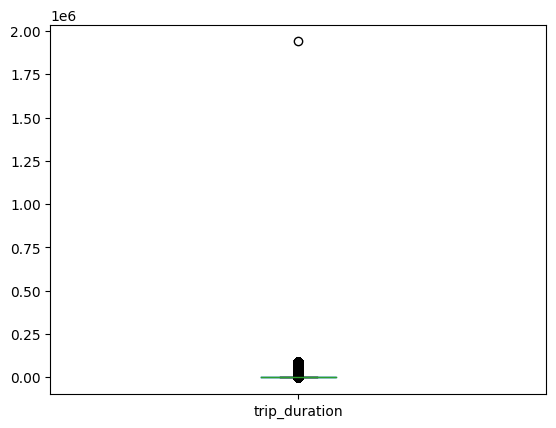

In [16]:
data.boxplot( column =['trip_duration'], grid = False)

As you can see there is a huge outlier, so we have to deal with it otherwise it might create problems at prediction stage. To deal with it we need to log transform the trip duration before prediction to visualise it better.

C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\662226402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['log_trip_duration'], kde = False, bins = 200)


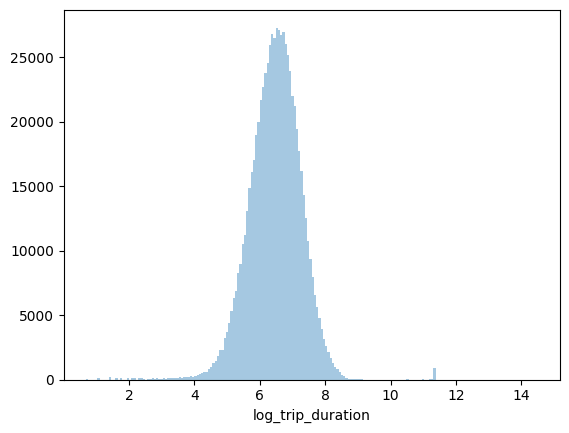

In [17]:
data['log_trip_duration'] = np.log(data['trip_duration'].values + 1)
sns.distplot(data['log_trip_duration'], kde = False, bins = 200)
plt.show()

In [18]:
# trip duration in hour
data['trip_duration']=data['trip_duration'].apply(lambda x:x/3600)

# Benchmark model

In [19]:
#creating and shuffling test and train data

from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

#creating 4 divisions
div = int(data.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

In [20]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour,log_trip_duration
469114,id2380741,2,2016-05-21 10:40:00,2016-05-21 10:51:00,1,-73.981796,40.762035,-73.972267,40.781265,0,0.182500,5,Saturday,10,5,Saturday,10,6.489205
694852,id3946961,2,2016-08-01 18:49:00,2016-08-01 18:52:00,5,-73.980965,40.747677,-73.982704,40.741161,0,0.054167,8,Monday,18,8,Monday,18,5.278115
696324,id0833913,1,2016-05-22 00:54:00,2016-05-22 01:08:00,1,-73.951065,40.782722,-73.867691,40.833664,0,0.233333,5,Sunday,0,5,Sunday,1,6.734592
356496,id1336849,1,2016-11-06 10:32:00,2016-11-06 10:38:00,1,-73.987625,40.762791,-73.973518,40.762909,0,0.110556,11,Sunday,10,11,Sunday,10,5.988961
645318,id1610858,1,2016-03-04 10:45:00,2016-03-04 10:57:00,3,-73.964333,40.792503,-73.988609,40.758369,0,0.189444,3,Friday,10,3,Friday,10,6.526495


In [21]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour,log_trip_duration
546991,id2240736,1,2016-05-25 07:59:00,2016-05-25 08:05:00,1,-73.991364,40.732590,-74.000526,40.742283,0,0.096111,5,Wednesday,7,5,Wednesday,8,5.849325
43126,id1423404,1,2016-01-18 12:17:00,2016-01-18 12:21:00,2,-73.966225,40.768059,-73.967606,40.763073,0,0.066667,1,Monday,12,1,Monday,12,5.484797
641450,id1317268,2,2016-02-03 18:39:00,2016-02-03 18:50:00,1,-73.994926,40.766018,-74.004219,40.742523,0,0.186389,2,Wednesday,18,2,Wednesday,18,6.510258
611380,id3335546,1,2016-06-04 19:17:00,2016-06-04 19:18:00,1,-73.974388,40.793781,-73.976006,40.792339,0,0.011944,6,Saturday,19,6,Saturday,19,3.784190
62690,id2174190,2,2016-06-21 18:35:00,2016-06-21 18:40:00,3,-73.963440,40.798557,-73.979736,40.777878,0,0.090278,6,Tuesday,18,6,Tuesday,18,5.786897


In [22]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\767296136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['simple_mean'] = train['trip_duration'].mean()


In [23]:
#calculating root mean squared error
from sklearn.metrics import mean_squared_error as MSE

simple_mean_error = np.sqrt(MSE(test['trip_duration'] , test['simple_mean']))
simple_mean_error

0.8904069340635619

# Mean trip_duration with respect to vendor_id

In [24]:
vend = pd.pivot_table(train, values='trip_duration', index = ['vendor_id'], aggfunc=np.mean)
vend

,trip_duration
vendor_id,
1,0.232826
2,0.291652


In [25]:
# initializing new column to zero
test['vend_mean'] = 0

for i in train['vendor_id'].unique():
  # Assign the mean value corresponding to unique entry
  test['vend_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()

C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2907128534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['vend_mean'] = 0
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2907128534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['vend_mean'][test['vendor_id'] == str(i)] = train['trip_duration'][train['vendor_id'] == str(i)].mean()
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2907128534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [26]:
#calculating root mean squared error
vend_error = np.sqrt(MSE(test['trip_duration'] , test['vend_mean'] ))
vend_error

0.9290781075032716

# mean trip_duration with respect to passenger_count

In [27]:
passenger_data = pd.pivot_table(train, values='trip_duration', index = ['passenger_count'], aggfunc=np.mean)
passenger_data

,trip_duration
passenger_count,
0,0.092981
1,0.255343
2,0.277822
3,0.287332
4,0.285759
5,0.299641
6,0.300193


In [28]:
# initializing new column to zero
test['passenger_data_mean'] = 0

for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['passenger_data_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()

C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2402352443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['passenger_data_mean'] = 0
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2402352443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['passenger_data_mean'][test['passenger_count'] == i] = train['trip_duration'][train['passenger_count'] == i].mean()
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\2402352443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

In [29]:
#calculating root mean squared error
passenger_data_error = np.sqrt(MSE(test['trip_duration'] , test['passenger_data_mean'] ))
passenger_data_error

0.8903158532144014

# mean trip_duration with respect to store_and_fwd_flag

In [30]:
store_and_fwd = pd.pivot_table(train, values='trip_duration', index = ['store_and_fwd_flag'], aggfunc=np.mean)
store_and_fwd

,trip_duration
store_and_fwd_flag,
0,0.264109
1,0.304058


In [31]:
# initializing new column to zero
test['store_and_fwd_mean'] = 0

for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd_mean'][test['store_and_fwd_flag'] == i] = train['trip_duration'][train['store_and_fwd_flag'] == i].mean()

C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\4020019145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['store_and_fwd_mean'] = 0
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\4020019145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['store_and_fwd_mean'][test['store_and_fwd_flag'] == i] = train['trip_duration'][train['store_and_fwd_flag'] == i].mean()
C:\Users\YOGENDRA SINGH\AppData\Local\Temp\ipykernel_18536\4020019145.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [32]:
#calculating root mean squared error
store_and_fwd_error = np.sqrt(MSE(test['trip_duration'] , test['store_and_fwd_mean'] ))
store_and_fwd_error

0.8904020727484226

# KNN Model

In [33]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day_name,pickup_hour,dropoff_month,dropoff_day_name,dropoff_hour,log_trip_duration
469114,id2380741,2,2016-05-21 10:40:00,2016-05-21 10:51:00,1,-73.981796,40.762035,-73.972267,40.781265,0,0.182500,5,Saturday,10,5,Saturday,10,6.489205
694852,id3946961,2,2016-08-01 18:49:00,2016-08-01 18:52:00,5,-73.980965,40.747677,-73.982704,40.741161,0,0.054167,8,Monday,18,8,Monday,18,5.278115
696324,id0833913,1,2016-05-22 00:54:00,2016-05-22 01:08:00,1,-73.951065,40.782722,-73.867691,40.833664,0,0.233333,5,Sunday,0,5,Sunday,1,6.734592
356496,id1336849,1,2016-11-06 10:32:00,2016-11-06 10:38:00,1,-73.987625,40.762791,-73.973518,40.762909,0,0.110556,11,Sunday,10,11,Sunday,10,5.988961
645318,id1610858,1,2016-03-04 10:45:00,2016-03-04 10:57:00,3,-73.964333,40.792503,-73.988609,40.758369,0,0.189444,3,Friday,10,3,Friday,10,6.526495


In [34]:
#seperating independent and dependent variables
x = data.drop(['trip_duration','id','pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','pickup_day_name','dropoff_day_name'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 8), (729322,))

In [35]:
# Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [37]:
x.head()

,vendor_id,passenger_count,store_and_fwd_flag,pickup_month,pickup_hour,dropoff_month,dropoff_hour,log_trip_duration
0,1.0,0.111111,0.0,0.363636,0.434783,0.363636,0.434783,0.420464
1,1.0,0.555556,0.0,0.636364,0.782609,0.636364,0.782609,0.332608
2,0.0,0.111111,0.0,0.363636,0.000000,0.363636,0.043478,0.438265
3,0.0,0.111111,0.0,0.909091,0.434783,0.909091,0.434783,0.384175
4,0.0,0.333333,0.0,0.181818,0.434783,0.181818,0.434783,0.423169


In [38]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [39]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN

In [40]:
from sklearn import preprocessing
#converting y values tocategorical values

label_encoder=preprocessing.LabelEncoder()
train_y=label_encoder.fit_transform(train_y)

In [45]:
# Creating instance of KNN
regg = KNN(n_neighbors = 20)

# Fitting the model
regg.fit(train_x, train_y)

# Predicting over the Train Set and calculating RMSE
test_predict = regg.predict(test_x)
k = np.sqrt(MSE(test_predict, test_y))
print('Test RMSE', k )

Test RMSE 903.0067661674134


In [46]:
def Elbow(K):
    #initiating empty list
    test_rmse = []
   
    #training model for evey value of K
    for i in K:
        #Instance on KNN
        regg = KNN(n_neighbors = i)
        regg.fit(train_x, train_y)
        # Appending rmse to empty list claculated using the predictions
        tmp = regg.predict(test_x)
        tmp = np.sqrt(MSE(tmp,test_y))
        test_rmse.append(tmp)
    
    return test_rmse

In [47]:
#Defining K range
k = range(1,50,5)

In [48]:
# calling above defined function
test = Elbow(k)

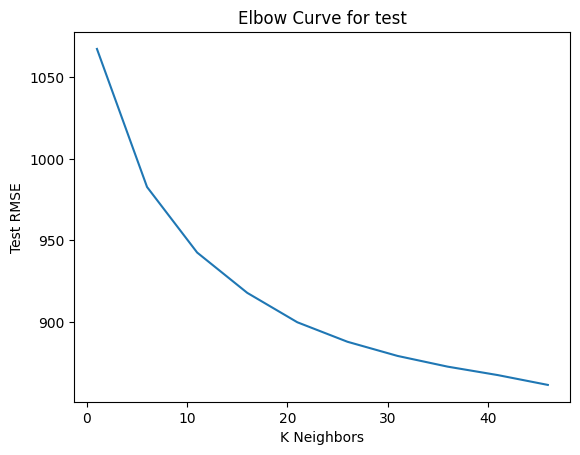

In [49]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test RMSE')
plt.title('Elbow Curve for test')
plt.show()

In [50]:
# Creating instance of KNN
regg = KNN(n_neighbors = 500)

# Fitting the model
regg.fit(train_x, train_y)

# Predicting over the Train Set and calculating RMSE
test_predict = regg.predict(test_x)
k = np.sqrt(MSE(test_predict, test_y))
print('Test RMSE ', k )

Test RMSE  631.1146544229413


The value of k is decreases as we increase the value of n_neighbours

# Linear Regression Model

In [51]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression as LR

In [52]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [53]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = np.sqrt(MSE(train_predict, train_y))
print('Training Root Mean Squared Error ', k )

Training Root Mean Squared Error  328.98027184282176


In [54]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = np.sqrt(MSE(test_predict, test_y))
print('Test Root Mean squared Error    ', k )

Test Root Mean squared Error     1026.4651165471541


In [55]:
lr.coef_

array([ 1.59557529e+00,  7.35662377e-01,  1.17596505e+02,  1.15753172e+01,
       -7.43299875e+01, -9.30038937e-01,  6.51509443e+01,  1.01877880e+04])

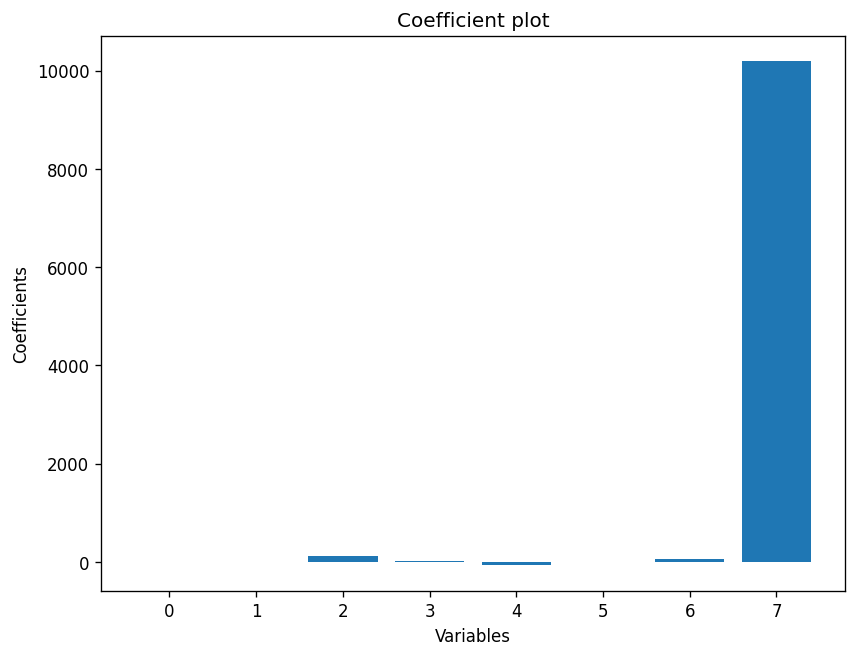

In [56]:
#plotting the coefficients

plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
plt.show()

In [57]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
711017,0.474167,1560.774277,-1560.300110
90179,0.340278,1316.516953,-1316.176675
191653,0.187778,883.053784,-882.866007
3951,0.137222,651.756615,-651.619393
4259,0.207222,945.686057,-945.478835


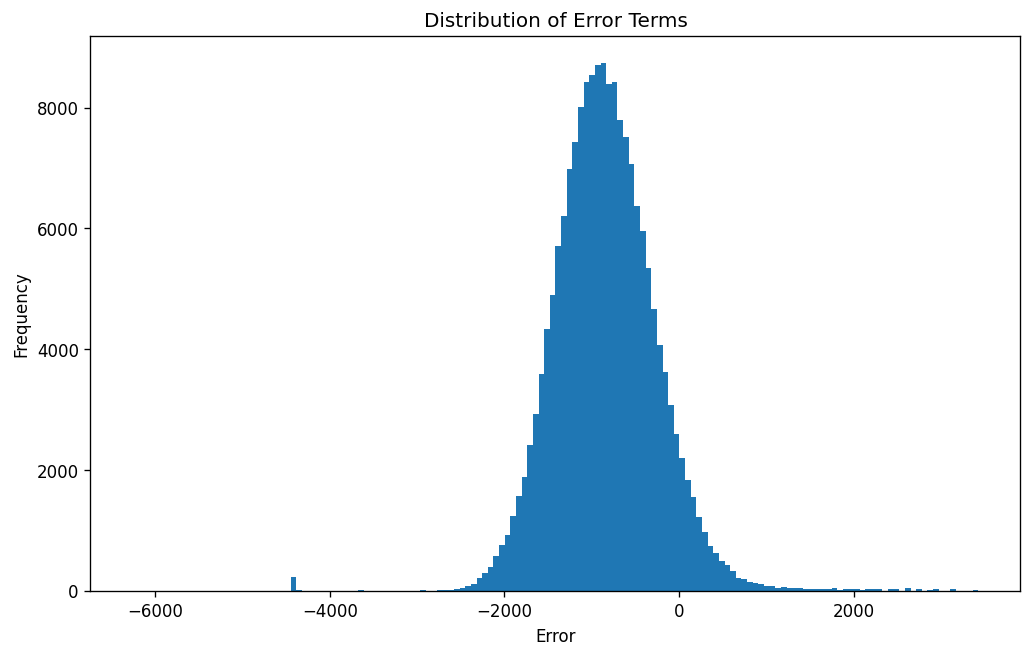

In [58]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

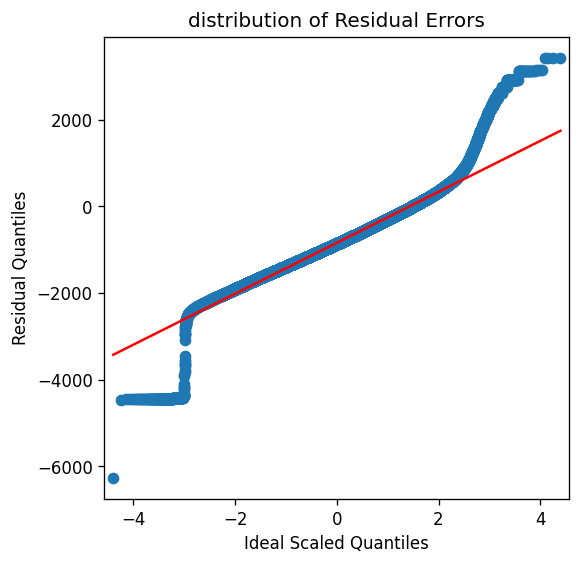

In [59]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher and lower end of the Residues.

# Conclusion
* From the above all three models I would prefer Linear Regression model also I prefer RMSE over all the evaluation metrics. 
* Test RMSE is way more than Train RMSE, so we can say that the data is either overfitted or because of complexity of data.